# Prototype: omikron

| Properties      | Data    |
|---------------|-----------|
| *Labels* | `ALL` |
| *Normalization* | `Min-Max` |
| *Sample Size* | `100.000`|
| *Adversarial Attack* | `FGSM & C&W & JSMA & PGD & Boundary & HSJ` |
| *Explanations* | `SHAP` |
| *Detector* | `Detect Attacks and Misclassified Samples` |


---

## *Setup*

In [1]:
# To import modules from the functions directory
import sys
import os
# Get current directory of script or notebook
current_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()

# Append parent directory (where "functions/" likely lives)
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)  # Make sure it's at the front

## Data Preprocessing

In [2]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

encoding_type = 0 # binary encoding
norm_type = 0 # min-max normalization
sample_size = 25000 # sample size for each label -> 2 x sample_size = total samples

dataset = dp.build_dataset()

normalizer, zero_columns = dp.generate_normalizer(dataset, norm_type)

feature_df, label_df, used_indices = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, sample_size=sample_size, random_sample_state=3001)
print(f"Generate Features | Indices: {feature_df.index[:5]}... | Shape: {feature_df.shape}")
print(f"Generate Labels | Indices: {label_df.index[:5]}... | Shape: {label_df.shape}")
print(label_df.value_counts()) # -> will first show [0, 1] then [1, 0] if label number is equal

-- Building CICIDS2017 dataset --
--- Combining all CICIDS2017 files ---
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
--- Removing NaN and Infinity values ---
Removing 1358 Rows with NaN values
Removing 1509 Rows with Infinity values
-- Generating normalizer --
--- Splitting labels and features ---
Zero Columns: [' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
-- Preprocessing data --
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Sampling balanced data ---
Sample to shape: (50000, 70)
--- Normalizing fea

## Split Data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.1, random_state=31)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45000, 70) (5000, 70) (45000, 2) (5000, 2)


## Create IDS

In [4]:
import functions.intrusion_detection_system as ids
import importlib
importlib.reload(ids)

# TODO: build ids with complete dataset
# X_train_all, y_train_all, _ = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, random_sample_state=42)
# print(y_train_all.value_counts())
# X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=42)
# print(X_train_all.shape, X_test_all.shape, y_train_all.shape, y_test_all.shape)

# build ids and evaluate it on test data
ids_model = ids.build_intrusion_detection_system(X_train, y_train, X_test, y_test)
# store prediction from X_train
y_pred = ids.predict(ids_model, X_train, columns=y_train.columns)
print(f"Predictions on Normal Data | Indices: {y_pred.index[:5]}... | Shape: {y_pred.shape}")

2025-04-24 11:58:21.797451: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745488701.809005   29059 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745488701.812509   29059 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-24 11:58:21.825492: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20


2025-04-24 11:58:23.185372: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - accuracy: 0.8688 - loss: 0.3384 - val_accuracy: 0.9356 - val_loss: 0.1466
Epoch 2/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - accuracy: 0.9434 - loss: 0.1376 - val_accuracy: 0.9496 - val_loss: 0.1224
Epoch 3/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.9527 - loss: 0.1181 - val_accuracy: 0.9536 - val_loss: 0.1112
Epoch 4/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - accuracy: 0.9570 - loss: 0.1088 - val_accuracy: 0.9572 - val_loss: 0.1063
Epoch 5/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - accuracy: 0.9591 - loss: 0.1026 - val_accuracy: 0.9577 - val_loss: 0.1023
Epoch 6/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - accuracy: 0.9610 - loss: 0.0978 - val_accuracy: 0.9580 - val_loss: 0.0985
Epoch 7/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.9631 - loss: 0.0936 - val_accuracy: 0.9594 - val_loss: 0.0964
Epoch 8/20
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - accuracy: 0.9649 - loss: 0.0900 - val_accurac

2025-04-24 11:58:39.505059: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step
Predictions on Normal Data | Indices: Index([502621, 2342657, 1281412, 214486, 131731], dtype='int64')... | Shape: (45000, 2)


## Generate Adversarial Attacks

In [6]:
import functions.attack_generator as ag
import importlib
import numpy as np
importlib.reload(ag)

all_features = dataset.drop(columns=[' Label'])
art_model = ag.convert_to_art_model(ids_model, X_train) # TODO: use all features for generating art model

# Split the training data into classes
class_labels = ["normal", "cw", "fgsm", "jsma", "pgd", "boundary", "hsj"]
splits = ag.split_into_attack_classes(X_train, y_train, class_labels)
X_normal, y_normal = splits["normal"]
X_cw, y_cw = splits["cw"]
X_fgsm, y_fgsm = splits["fgsm"]
X_jsma, y_jsma = splits["jsma"]
X_pgd, y_pgd = splits["pgd"]
X_boundary, y_boundary = splits["boundary"]
X_hsj, y_hsj = splits["hsj"]
print(f"Normal Data: {X_normal.shape} | CW Data: {X_cw.shape} | FGSM Data: {X_fgsm.shape} | JSMA Data: {X_jsma.shape} | PGD Data: {X_pgd.shape} | Boundary Data: {X_boundary.shape} | HSJ Data: {X_hsj.shape}")

# -- White-Box Attacks --
# generate attacks on the separated training data
# X_adv_fgsm = ag.generate_fgsm_attacks(art_model, X_fgsm)
# print(f"Create FGSM Adversarial Attack | Indices: {X_adv_fgsm.index[:5]}... | Shape: {X_adv_fgsm.shape}")
# y_pred_adv_fgsm = ag.evaluate_art_model(art_model, X_adv_fgsm, y_fgsm)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_fgsm.index[:5]}... | Shape: {y_pred_adv_fgsm.shape}")
# y_pred_fgsm = y_pred.loc[X_fgsm.index]

import multiprocessing
num_cores = multiprocessing.cpu_count()
X_adv_cw = ag.generate_cw_attacks_parallel(art_model, X_cw, num_cores=num_cores)
print(f"Create CW Adversarial Attack | Indices: {X_adv_cw.index[:5]}... | Shape: {X_adv_cw.shape}")
y_pred_adv_cw = ag.evaluate_art_model(art_model, X_adv_cw, y_cw)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_cw.index[:5]}... | Shape: {y_pred_adv_cw.shape}")
y_pred_cw = y_pred.loc[X_cw.index]

# X_adv_jsma = ag.generate_jsma_attacks(art_model, X_jsma)
# print(f"Create JSMA Adversarial Attack | Indices: {X_adv_jsma.index[:5]}... | Shape: {X_adv_jsma.shape}")
# y_pred_adv_jsma = ag.evaluate_art_model(art_model, X_adv_jsma, y_jsma)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_jsma.index[:5]}... | Shape: {y_pred_adv_jsma.shape}")
# y_pred_jsma = y_pred.loc[X_jsma.index]

# X_adv_pgd = ag.generate_pgd_attacks(art_model, X_pgd)
# print(f"Create PGD Adversarial Attack | Indices: {X_adv_pgd.index[:5]}... | Shape: {X_adv_pgd.shape}")
# y_pred_adv_pgd = ag.evaluate_art_model(art_model, X_adv_pgd, y_pgd)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_pgd.index[:5]}... | Shape: {y_pred_adv_pgd.shape}")
# y_pred_pgd = y_pred.loc[X_pgd.index]

# -- Black-Box Attacks --
# import pandas as pd
# X_hsj_first = X_hsj[:8000] # split data to avoid memory error
# X_hsj_second = X_hsj[8000:16000]
# X_adv_hsj_first = ag.generate_hsj_attacks_parallel(art_model, X_hsj_first, target_label=1, num_cores=num_cores-1) # TODO: use num_cores-1 to avoid memory error
# X_adv_hsj_second = ag.generate_hsj_attacks_parallel(art_model, X_hsj_second, target_label=1, num_cores=num_cores-1) # TODO: use num_cores-1 to avoid memory error
# X_adv_hsj = pd.concat([X_adv_hsj_first, X_adv_hsj_second])
# # X_adv_hsj = ag.generate_hsj_attacks_parallel(art_model, X_hsj, target_label=1, num_cores=num_cores)
# print(f"Create HSJ Adversarial Attack | Indices: {X_adv_hsj.index[:5]}... | Shape: {X_adv_hsj.shape}")
# y_pred_adv_hsj = ag.evaluate_art_model(art_model, X_adv_hsj, y_hsj)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_hsj.index[:5]}... | Shape: {y_pred_adv_hsj.shape}")
# y_pred_hsj = y_pred.loc[X_hsj.index]

# X_boundary_first = X_boundary[:8000] # split data to avoid memory error
# X_boundary_second = X_boundary[8000:16000]
# X_adv_boundary_first = ag.generate_boundary_attacks_parallel(art_model, X_boundary_first, target_label=1, num_cores=num_cores)
# X_adv_boundary_second = ag.generate_boundary_attacks_parallel(art_model, X_boundary_second, target_label=1, num_cores=num_cores)
# X_adv_boundary = pd.concat([X_adv_boundary_first, X_adv_boundary_second])
# print(f"Create Boundary Adversarial Attack | Indices: {X_adv_boundary.index[:5]}... | Shape: {X_adv_boundary.shape}")
# y_pred_adv_boundary = ag.evaluate_art_model(art_model, X_adv_boundary, y_boundary)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_boundary.index[:5]}... | Shape: {y_pred_adv_boundary.shape}")
# y_pred_boundary = y_pred.loc[X_adv_boundary.index]

Normal Data: (6432, 70) | CW Data: (6428, 70) | FGSM Data: (6428, 70) | JSMA Data: (6428, 70) | PGD Data: (6428, 70) | Boundary Data: (6428, 70) | HSJ Data: (6428, 70)
Running attack using 24 CPU cores...

Process 31601 is generating adversarial examples for batch of size 267 
Process 31602 is generating adversarial examples for batch of size 267 
Process 31603 is generating adversarial examples for batch of size 267 
Process 31604 is generating adversarial examples for batch of size 267 
Process 31605 is generating adversarial examples for batch of size 267 
Process 31607 is generating adversarial examples for batch of size 267 
Process 31606 is generating adversarial examples for batch of size 267 




Process 31608 is generating adversarial examples for batch of size 267 


Process 31609 is generating adversarial examples for batch of size 267 
Process 31610 is generating adversarial examples for batch of size 267 
Process 31611 is generating adversarial examples for batch of size 2

KeyboardInterrupt: 

In [ ]:
print(f"Adversarial Samples Generated | FGSM: {X_adv_fgsm.shape} | CW: {X_adv_cw.shape} | JSMA: {X_adv_jsma.shape} | PGD: {X_adv_pgd.shape}")

NameError: name 'X_adv_fgsm' is not defined

: 

In [ ]:
def get_correctly_benign_classified_indices(y_train, y_pred):
    benign_indices = y_train[y_train['BENIGN'] == 1].index
    benign_adv_predicted_indices = y_pred[y_pred['BENIGN'] == 1].index
    correctly_benign_classified_indices = benign_indices.intersection(benign_adv_predicted_indices)
    return correctly_benign_classified_indices

def get_misclassified_as_benign_due_attack_indices(y_train, y_pred, y_pred_adv):
    attack_indices = y_train[y_train['ATTACK'] == 1].index
    attack_adv_predicted_indices = y_pred[y_pred['ATTACK'] == 1].index
    benign_predicted_adversarial_indices = y_pred_adv[y_pred_adv['BENIGN'] == 1].index
    misclassified_as_benign_due_attack_indices = attack_indices.intersection(attack_adv_predicted_indices).intersection(benign_predicted_adversarial_indices)
    return misclassified_as_benign_due_attack_indices

def get_correctly_malicious_classified_indices(y_train, y_pred):
    malicious_indices = y_train[y_train['ATTACK'] == 1].index
    malicious_adv_predicted_indices = y_pred[y_pred['ATTACK'] == 1].index
    correctly_malicious_classified_indices = malicious_indices.intersection(malicious_adv_predicted_indices)
    return correctly_malicious_classified_indices

def get_misclassified_as_malicious_due_attack_indices(y_train, y_pred, y_pred_adv):
    benign_indices = y_train[y_train['BENIGN'] == 1].index
    benign_adv_predicted_indices = y_pred[y_pred['BENIGN'] == 1].index
    attack_predicted_adversarial_indices = y_pred_adv[y_pred_adv['ATTACK'] == 1].index
    misclassified_as_malicious_due_attack_indices = benign_indices.intersection(benign_adv_predicted_indices).intersection(attack_predicted_adversarial_indices)
    return misclassified_as_malicious_due_attack_indices

In [ ]:
y_pred_normal = y_pred.loc[X_normal.index]
correctly_benign_classified_indices = get_correctly_benign_classified_indices(y_normal, y_pred_normal)
misclassified_as_benign_indices = get_misclassified_as_benign_due_attack_indices(y_normal, y_normal, y_pred_normal)
correctly_malicious_classified_indices = get_correctly_malicious_classified_indices(y_normal, y_pred_normal)
misclassified_as_malicious_due_attack_indices = get_misclassified_as_malicious_due_attack_indices(y_normal, y_normal, y_pred_normal)

correctly_benign_classified_indices_fgsm = get_correctly_benign_classified_indices(y_fgsm, y_pred_adv_fgsm)
misclassified_as_benign_due_attack_indices_fgsm = get_misclassified_as_benign_due_attack_indices(y_fgsm, y_pred_fgsm, y_pred_adv_fgsm)
correctly_malicious_classified_indices_fgsm = get_correctly_malicious_classified_indices(y_fgsm, y_pred_fgsm)
misclassified_as_malicious_due_attack_indices_fgsm = get_misclassified_as_malicious_due_attack_indices(y_fgsm, y_pred_fgsm, y_pred_adv_fgsm)

correctly_benign_classified_indices_cw = get_correctly_benign_classified_indices(y_cw, y_pred_cw)
misclassified_as_benign_due_attack_indices_cw = get_misclassified_as_benign_due_attack_indices(y_cw, y_pred_cw, y_pred_adv_cw)
correctly_malicious_classified_indices_cw = get_correctly_malicious_classified_indices(y_cw, y_pred_cw)
misclassified_as_malicious_due_attack_indices_cw = get_misclassified_as_malicious_due_attack_indices(y_cw, y_pred_cw, y_pred_adv_cw)

correctly_benign_classified_indices_jsma = get_correctly_benign_classified_indices(y_jsma, y_pred_jsma)
misclassified_as_benign_due_attack_indices_jsma = get_misclassified_as_benign_due_attack_indices(y_jsma, y_pred_jsma, y_pred_adv_jsma)
correctly_malicious_classified_indices_jsma = get_correctly_malicious_classified_indices(y_jsma, y_pred_jsma)
misclassified_as_malicious_due_attack_indices_jsma = get_misclassified_as_malicious_due_attack_indices(y_jsma, y_pred_jsma, y_pred_adv_jsma)

# TODO: is it correct to only include the samples that are correctly classified from the IDS?
correctly_benign_classified_indices_pgd = get_correctly_benign_classified_indices(y_pgd, y_pred_pgd)
misclassified_as_benign_due_attack_indices_pgd = get_misclassified_as_benign_due_attack_indices(y_pgd, y_pred_pgd, y_pred_adv_pgd)
correctly_malicious_classified_indices_pgd = get_correctly_malicious_classified_indices(y_pgd, y_pred_pgd)
misclassified_as_malicious_due_attack_indices_pgd = get_misclassified_as_malicious_due_attack_indices(y_pgd, y_pred_pgd, y_pred_adv_pgd)

# correctly_benign_classified_indices_boundary = get_correctly_benign_classified_indices(y_boundary, y_pred_adv_boundary)
# misclassified_as_benign_due_attack_indices_boundary = get_misclassified_as_benign_due_attack_indices(y_boundary, y_pred_boundary, y_pred_adv_boundary)

# correctly_benign_classified_indices_hsj = get_correctly_benign_classified_indices(y_hsj, y_pred_hsj)
# misclassified_as_benign_due_attack_indices_hsj = get_misclassified_as_benign_due_attack_indices(y_hsj, y_pred_hsj, y_pred_adv_hsj)

print(f"Correctly classified as BENIGN from the IDS: {len(correctly_benign_classified_indices)} | Indices: {correctly_benign_classified_indices[:3]}")
print(f"ATTACK sample misclassified as BENIGN from the IDS: {len(misclassified_as_benign_indices)} | Indices: {misclassified_as_benign_indices[:3]}")
print(f"Correctly classified as ATTACK from the IDS: {len(correctly_malicious_classified_indices)} | Indices: {correctly_malicious_classified_indices[:3]}")
print(f"ATTACK sample misclassified as ATTACK from the IDS: {len(misclassified_as_malicious_due_attack_indices)} | Indices: {misclassified_as_malicious_due_attack_indices[:3]}")
print(f"    Correctly classified as BENIGN from the IDS (FGSM): {len(correctly_benign_classified_indices_fgsm)} | Indices: {correctly_benign_classified_indices_fgsm[:3]}")
print(f"    ATTACK sample misclassified as BENIGN due to adversarial attack (FGSM): {len(misclassified_as_benign_due_attack_indices_fgsm)} | Indices: {misclassified_as_benign_due_attack_indices_fgsm[:3]}")
print(f"    Correctly classified as ATTACK from the IDS (FGSM): {len(correctly_malicious_classified_indices_fgsm)} | Indices: {correctly_malicious_classified_indices_fgsm[:3]}")
print(f"    ATTACK sample misclassified as ATTACK due to adversarial attack (FGSM): {len(misclassified_as_malicious_due_attack_indices_fgsm)} | Indices: {misclassified_as_malicious_due_attack_indices_fgsm[:3]}")
print(f"        Correctly classified as BENIGN from the IDS (CW): {len(correctly_benign_classified_indices_cw)} | Indices: {correctly_benign_classified_indices_cw[:3]}")
print(f"        ATTACK sample misclassified as BENIGN due to adversarial attack (CW): {len(misclassified_as_benign_due_attack_indices_cw)} | Indices: {misclassified_as_benign_due_attack_indices_cw[:3]}")
print(f"        Correctly classified as ATTACK from the IDS (CW): {len(correctly_malicious_classified_indices_cw)} | Indices: {correctly_malicious_classified_indices_cw[:3]}")
print(f"        ATTACK sample misclassified as ATTACK due to adversarial attack (CW): {len(misclassified_as_malicious_due_attack_indices_cw)} | Indices: {misclassified_as_malicious_due_attack_indices_cw[:3]}")
print(f"            Correctly classified as BENIGN from the IDS (PGD): {len(correctly_benign_classified_indices_pgd)} | Indices: {correctly_benign_classified_indices_pgd[:3]}")
print(f"            ATTACK sample misclassified as BENIGN due to adversarial attack (PGD): {len(misclassified_as_benign_due_attack_indices_pgd)} | Indices: {misclassified_as_benign_due_attack_indices_pgd[:3]}")
print(f"            Correctly classified as ATTACK from the IDS (PGD): {len(correctly_malicious_classified_indices_pgd)} | Indices: {correctly_malicious_classified_indices_pgd[:3]}")
print(f"            ATTACK sample misclassified as ATTACK due to adversarial attack (PGD): {len(misclassified_as_malicious_due_attack_indices_pgd)} | Indices: {misclassified_as_malicious_due_attack_indices_pgd[:3]}")
print(f"                Correctly classified as BENIGN from the IDS (JSMA): {len(correctly_benign_classified_indices_jsma)} | Indices: {correctly_benign_classified_indices_jsma[:3]}")
print(f"                ATTACK sample misclassified as BENIGN due to adversarial attack (JSMA): {len(misclassified_as_benign_due_attack_indices_jsma)} | Indices: {misclassified_as_benign_due_attack_indices_jsma[:3]}")
print(f"                Correctly classified as ATTACK from the IDS (JSMA): {len(correctly_malicious_classified_indices_jsma)} | Indices: {correctly_malicious_classified_indices_jsma[:3]}")
print(f"                ATTACK sample misclassified as ATTACK due to adversarial attack (JSMA): {len(misclassified_as_malicious_due_attack_indices_jsma)} | Indices: {misclassified_as_malicious_due_attack_indices_jsma[:3]}")
# print(f"                    Correctly classified as BENIGN from the IDS (Boundary): {len(correctly_benign_classified_indices_boundary)} | Indices: {correctly_benign_classified_indices_boundary[:3]}")
# print(f"                    ATTACK sample misclassified as BENIGN due to adversarial attack (Boundary): {len(misclassified_as_benign_due_attack_indices_boundary)} | Indices: {misclassified_as_benign_due_attack_indices_boundary[:3]}")
# print(f"                        Correctly classified as BENIGN from the IDS (HSJ): {len(correctly_benign_classified_indices_hsj)} | Indices: {correctly_benign_classified_indices_hsj[:3]}")
# print(f"                        ATTACK sample misclassified as BENIGN due to adversarial attack (HSJ): {len(misclassified_as_benign_due_attack_indices_hsj)} | Indices: {misclassified_as_benign_due_attack_indices_hsj[:3]}")

Correctly classified as BENIGN from the IDS: 3085 | Indices: Index([1487797, 2163912, 398248], dtype='int64')
ATTACK sample misclassified as BENIGN from the IDS: 17 | Indices: Index([1927479, 250708, 1027206], dtype='int64')
Correctly classified as ATTACK from the IDS: 3214 | Indices: Index([145104, 162026, 175538], dtype='int64')
ATTACK sample misclassified as ATTACK from the IDS: 116 | Indices: Index([2727013, 2677065, 2047779], dtype='int64')
    Correctly classified as BENIGN from the IDS (FGSM): 1265 | Indices: Index([2326646, 1006374, 2561613], dtype='int64')
    ATTACK sample misclassified as BENIGN due to adversarial attack (FGSM): 3166 | Indices: Index([96625, 1195145, 246927], dtype='int64')
    Correctly classified as ATTACK from the IDS (FGSM): 3166 | Indices: Index([96625, 1195145, 246927], dtype='int64')
    ATTACK sample misclassified as ATTACK due to adversarial attack (FGSM): 1982 | Indices: Index([1725987, 552613, 847649], dtype='int64')
        Correctly classified a

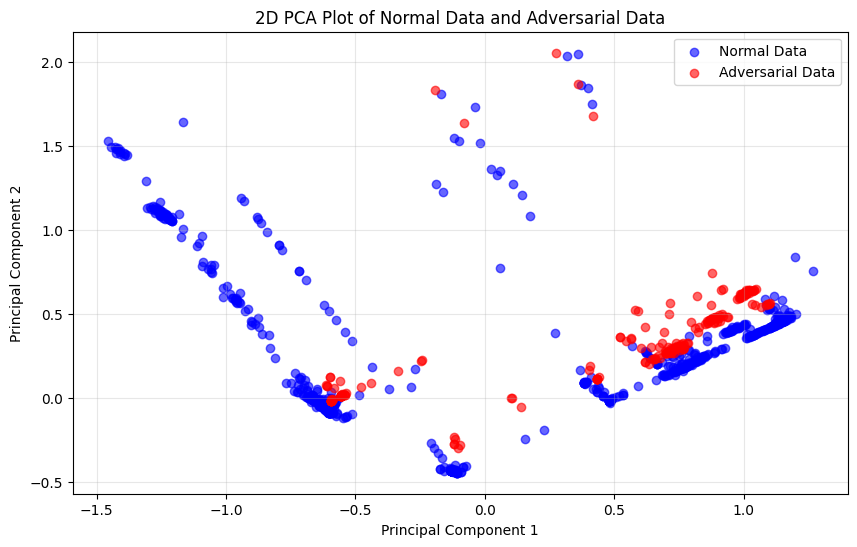

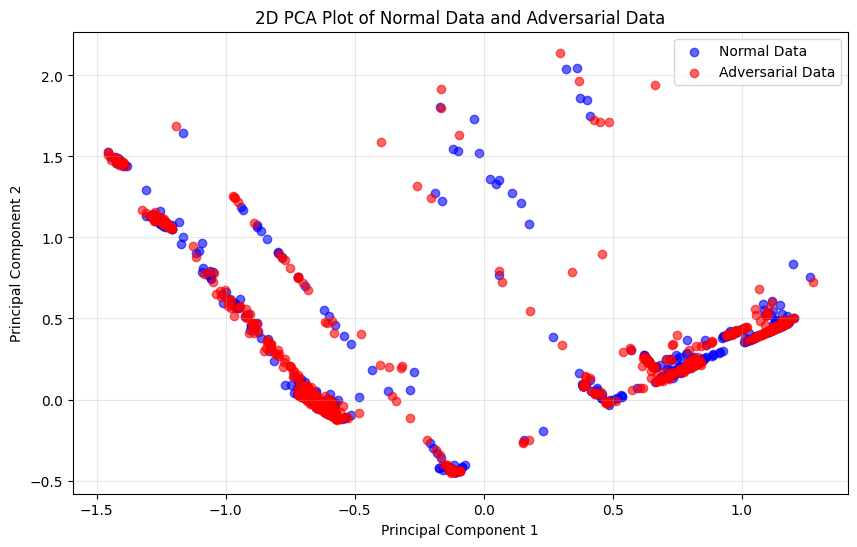

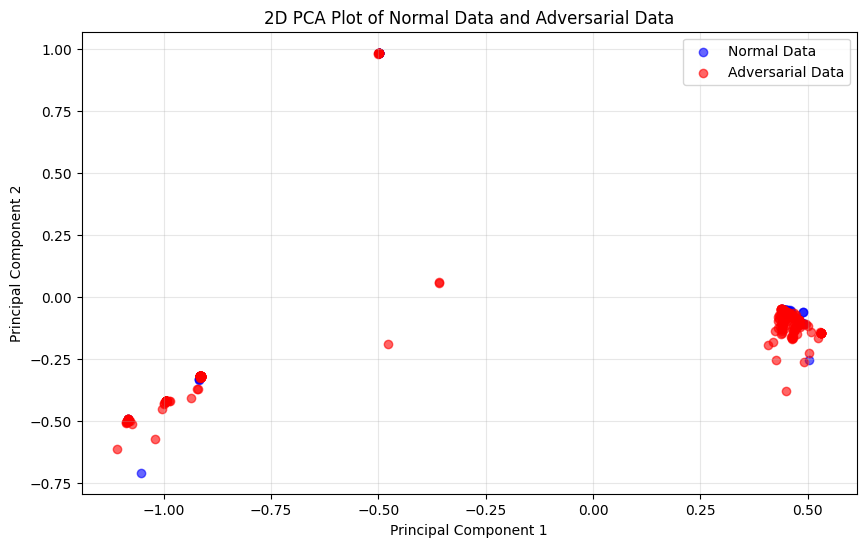

In [ ]:
# import functions.visualizer as visualizer
# import importlib
# importlib.reload(visualizer)

# visualizer.visualize_data_distribution(X_train.loc[correctly_benign_classified_indices], 'Normal Data', X_adv_fgsm.loc[correctly_benign_classified_indices_fgsm], 'Adversarial Data')
# visualizer.visualize_data_distribution(X_train.loc[correctly_benign_classified_indices], 'Normal Data', X_adv_cw.loc[correctly_benign_classified_indices_cw], 'Adversarial Data')
# visualizer.visualize_data_distribution(X_train.loc[misclassified_as_malicious_due_attack_indices], 'Normal Data', X_adv_cw.loc[misclassified_as_malicious_due_attack_indices_cw], 'Adversarial Data')

## Explainer

In [ ]:
import functions.explainer as exp
import importlib
importlib.reload(exp)

explainer = exp.generate_shap_explainer(ids_model, X_train)

shap_values_df = exp.generate_shap_values(explainer, X_normal)
print(f"Generate Explanations | Indices: {shap_values_df.index[:5]}... | Shape: {shap_values_df.shape}")

shap_values_adv_df_fgsm = exp.generate_shap_values(explainer, X_adv_fgsm)
print(f"Generate FGSM Adversarial Explanations | Indices: {shap_values_adv_df_fgsm.index[:5]}... | Shape: {shap_values_adv_df_fgsm.shape}")

shap_values_adv_df_cw = exp.generate_shap_values(explainer, X_adv_cw)
print(f"Generate CW Adversarial Explanations | Indices: {shap_values_adv_df_cw.index[:5]}... | Shape: {shap_values_adv_df_cw.shape}")

shap_values_adv_df_jsma = exp.generate_shap_values(explainer, X_adv_jsma)
print(f"Generate JSMA Adversarial Explanations | Indices: {shap_values_adv_df_jsma.index[:5]}... | Shape: {shap_values_adv_df_jsma.shape}")

shap_values_adv_df_pgd = exp.generate_shap_values(explainer, X_adv_pgd)
print(f"Generate PGD Adversarial Explanations | Indices: {shap_values_adv_df_pgd.index[:5]}... | Shape: {shap_values_adv_df_pgd.shape}")

# shap_values_adv_df_boundary = exp.generate_shap_values(explainer, X_adv_boundary)
# print(f"Generate Boundary Adversarial Explanations | Indices: {shap_values_adv_df_boundary.index[:5]}... | Shape: {shap_values_adv_df_boundary.shape}")

# shap_values_adv_df_hsj = exp.generate_shap_values(explainer, X_adv_hsj)
# print(f"Generate HSJ Adversarial Explanations | Indices: {shap_values_adv_df_hsj.index[:5]}... | Shape: {shap_values_adv_df_hsj.shape}")

PermutationExplainer explainer: 6433it [03:17, 30.85it/s]                          


Generate Explanations | Indices: Index([1487797, 145104, 2163912, 398248, 162026], dtype='int64')... | Shape: (6432, 70)


PermutationExplainer explainer: 6429it [02:58, 33.90it/s]                          


Generate FGSM Adversarial Explanations | Indices: Index([96625, 1725987, 552613, 1195145, 246927], dtype='int64')... | Shape: (6428, 70)


PermutationExplainer explainer: 6429it [03:25, 29.65it/s]                          


Generate CW Adversarial Explanations | Indices: Index([749710, 477188, 636804, 371618, 895450], dtype='int64')... | Shape: (6428, 70)


PermutationExplainer explainer: 6429it [03:24, 29.91it/s]                          


Generate JSMA Adversarial Explanations | Indices: Index([909203, 2146693, 1105840, 2616810, 144546], dtype='int64')... | Shape: (6428, 70)


PermutationExplainer explainer: 6429it [03:03, 33.06it/s]                          


Generate PGD Adversarial Explanations | Indices: Index([2178268, 1084577, 195582, 827420, 1068413], dtype='int64')... | Shape: (6428, 70)


In [ ]:
# store shap values
shap_values_df.to_csv("../../datasets/CICIDS2017/shap_values/pi-shap_values.csv", index=False)
shap_values_adv_df_fgsm.to_csv("../../datasets/CICIDS2017/shap_values/pi-shap_values_adv_fgsm.csv", index=False)
shap_values_adv_df_cw.to_csv("../../datasets/CICIDS2017/shap_values/pi-shap_values_adv_cw.csv", index=False)
shap_values_adv_df_jsma.to_csv("../../datasets/CICIDS2017/shap_values/pi-shap_values_adv_jsma.csv", index=False)
shap_values_adv_df_pgd.to_csv("../../datasets/CICIDS2017/shap_values/pi-shap_values_adv_pgd.csv", index=False)
# shap_values_adv_df_boundary.to_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_boundary.csv", index=False)
# shap_values_adv_df_hsj.to_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_hsj.csv", index=False)

In [ ]:
# # load shap values
# shap_values_df = pd.read_csv("../../datasets/CICIDS2017/shap_values/shap_values.csv")
# shap_values_adv_df_fgsm = pd.read_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_fgsm.csv")
# shap_values_adv_df_cw = pd.read_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_cw.csv")
# shap_values_adv_df_jsma = pd.read_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_jsma.csv")
# shap_values_adv_df_pgd = pd.read_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_pgd.csv")
# shap_values_adv_df_boundary = pd.read_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_boundary.csv")
# shap_values_adv_df_hsj = pd.read_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_hsj.csv")

In [13]:
# import functions.visualizer as visualizer
# import importlib
# importlib.reload(visualizer)

# visualizer.visualize_data_distribution(shap_values_df.loc[correctly_benign_classified_indices], 'Normal Explanations', shap_values_adv_df_fgsm.loc[misclassified_as_benign_due_attack_indices_fgsm], 'Adversarial Explanations')

In [14]:
# exp.plot_shap_summary_comparison(shap_values_df.loc[correctly_benign_classified_indices].values, X_train.loc[correctly_benign_classified_indices], shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices].values, X_adv.loc[misclassified_as_benign_due_attack_indices], 6, title='Normal vs Adversarial Explanations of Benign Samples')

In [ ]:
import pandas as pd
adv_concat_correctly_benign_classified_shaps = pd.concat([
    shap_values_adv_df_fgsm.loc[correctly_benign_classified_indices_fgsm],
    shap_values_adv_df_pgd.loc[correctly_benign_classified_indices_pgd],
    shap_values_adv_df_cw.loc[correctly_benign_classified_indices_cw],
    shap_values_adv_df_jsma.loc[correctly_benign_classified_indices_jsma],
    shap_values_adv_df_fgsm.loc[misclassified_as_malicious_due_attack_indices_fgsm], 
    shap_values_adv_df_pgd.loc[misclassified_as_malicious_due_attack_indices_pgd],
    shap_values_adv_df_cw.loc[misclassified_as_malicious_due_attack_indices_cw],
    shap_values_adv_df_jsma.loc[misclassified_as_malicious_due_attack_indices_jsma],
    shap_values_df.loc[correctly_benign_classified_indices], # TODO: test without them in a 4-class classification
    ], axis=0)

# adv_concat_misclassified_as_benign_shaps = pd.concat([
#     shap_values_adv_df_fgsm.loc[misclassified_as_benign_due_attack_indices_fgsm], 
#     shap_values_adv_df_pgd.loc[misclassified_as_benign_due_attack_indices_pgd],
#     shap_values_adv_df_cw.loc[misclassified_as_benign_due_attack_indices_cw],
#     shap_values_adv_df_jsma.loc[misclassified_as_benign_due_attack_indices_jsma]
#     ], axis=0)

adv_concat_correctly_malicious_classified_shaps = pd.concat([
    shap_values_adv_df_fgsm.loc[correctly_malicious_classified_indices_fgsm], 
    shap_values_adv_df_pgd.loc[correctly_malicious_classified_indices_pgd],
    shap_values_adv_df_cw.loc[correctly_malicious_classified_indices_cw],
    shap_values_adv_df_jsma.loc[correctly_malicious_classified_indices_jsma],
    shap_values_adv_df_fgsm.loc[misclassified_as_benign_due_attack_indices_fgsm], 
    shap_values_adv_df_pgd.loc[misclassified_as_benign_due_attack_indices_pgd],
    shap_values_adv_df_cw.loc[misclassified_as_benign_due_attack_indices_cw],
    shap_values_adv_df_jsma.loc[misclassified_as_benign_due_attack_indices_jsma],
    shap_values_df.loc[correctly_malicious_classified_indices], # TODO: test without them in a 4-class classification
    ], axis=0)

# adv_concat_misclassified_as_malicious_shaps = pd.concat([
#     shap_values_adv_df_fgsm.loc[misclassified_as_malicious_due_attack_indices_fgsm], 
#     shap_values_adv_df_pgd.loc[misclassified_as_malicious_due_attack_indices_pgd],
#     shap_values_adv_df_cw.loc[misclassified_as_malicious_due_attack_indices_cw],
#     shap_values_adv_df_jsma.loc[misclassified_as_malicious_due_attack_indices_jsma]
#     ], axis=0)

concat_correct_benign_shaps = pd.concat([
    shap_values_df.loc[correctly_benign_classified_indices], 
    ], axis=0)

concat_correct_attack_shaps = pd.concat([
    shap_values_df.loc[correctly_malicious_classified_indices],
    ], axis=0)

print(f" ADV Correctly BENIGN : {adv_concat_correctly_benign_classified_shaps.shape} | ADV Misclassified as BENIGN: {adv_concat_misclassified_as_benign_shaps.shape} | ADV Correctly ATTACK: {adv_concat_correctly_malicious_classified_shaps.shape} | ADV Misclassified as ATTACK: {adv_concat_misclassified_as_malicious_shaps.shape} | BENIGN: {concat_correct_benign_shaps.shape} | ATTACK: {concat_correct_attack_shaps.shape}")

 ADV Correctly BENIGN : (21678, 70) | ADV Misclassified as BENIGN: (11316, 70) | ADV Correctly ATTACK: (27381, 70) | ADV Misclassified as ATTACK: (8141, 70) | BENIGN: (3085, 70) | ATTACK: (3214, 70)


In [ ]:
# import pandas as pd

# adv_concat_misclassified_as_benign_shaps = pd.concat([
#     shap_values_adv_df_fgsm.loc[misclassified_as_benign_due_attack_indices_fgsm], 
#     shap_values_adv_df_pgd.loc[misclassified_as_benign_due_attack_indices_pgd],
#     shap_values_adv_df_cw.loc[misclassified_as_benign_due_attack_indices_cw],
#     shap_values_adv_df_jsma.loc[misclassified_as_benign_due_attack_indices_jsma]
#     ], axis=0)


# adv_concat_misclassified_as_malicious_shaps = pd.concat([
#     shap_values_adv_df_fgsm.loc[misclassified_as_malicious_due_attack_indices_fgsm], 
#     shap_values_adv_df_pgd.loc[misclassified_as_malicious_due_attack_indices_pgd],
#     shap_values_adv_df_cw.loc[misclassified_as_malicious_due_attack_indices_cw],
#     shap_values_adv_df_jsma.loc[misclassified_as_malicious_due_attack_indices_jsma]
#     ], axis=0)

# concat_correct_benign_shaps = pd.concat([
#     shap_values_df.loc[correctly_benign_classified_indices], 
#     shap_values_adv_df_fgsm.loc[correctly_benign_classified_indices_fgsm],
#     shap_values_adv_df_pgd.loc[correctly_benign_classified_indices_pgd],
#     shap_values_adv_df_cw.loc[correctly_benign_classified_indices_cw],
#     shap_values_adv_df_jsma.loc[correctly_benign_classified_indices_jsma],
#     ], axis=0)

# concat_correct_attack_shaps = pd.concat([
#     shap_values_df.loc[correctly_malicious_classified_indices],
#     shap_values_adv_df_fgsm.loc[correctly_malicious_classified_indices_fgsm], 
#     shap_values_adv_df_pgd.loc[correctly_malicious_classified_indices_pgd],
#     shap_values_adv_df_cw.loc[correctly_malicious_classified_indices_cw],
#     shap_values_adv_df_jsma.loc[correctly_malicious_classified_indices_jsma]
#     ], axis=0)

# print(f" ADV Correctly BENIGN : {adv_concat_correctly_benign_classified_shaps.shape} | ADV Misclassified as BENIGN: {adv_concat_misclassified_as_benign_shaps.shape} | ADV Correctly ATTACK: {adv_concat_correctly_malicious_classified_shaps.shape} | ADV Misclassified as ATTACK: {adv_concat_misclassified_as_malicious_shaps.shape} | BENIGN: {concat_correct_benign_shaps.shape} | ATTACK: {concat_correct_attack_shaps.shape}")

 ADV Correctly BENIGN : (2014, 70) | ADV Misclassified as BENIGN: (2215, 70) | ADV Correctly ATTACK: (2475, 70) | ADV Misclassified as ATTACK: (1822, 70) | BENIGN: (2600, 70) | ATTACK: (3125, 70)


## Detector

In [ ]:
import functions.detector as det
import importlib
importlib.reload(det)

# create dataframe
class_samples = {
    'ADV CORRECT ATTACK': adv_concat_correctly_malicious_classified_shaps,
    # 'ADV MISCLASSIFIED ATTACK': adv_concat_misclassified_as_malicious_shaps,
    'ADV CORRECT BENIGN': adv_concat_correctly_benign_classified_shaps,
    # 'ADV MISCLASSIFIED BENIGN': adv_concat_misclassified_as_benign_shaps,
    # 'CORRECT BENIGN': concat_correct_benign_shaps, 
    # 'CORRECT ATTACK': concat_correct_attack_shaps,
}
X, y = det.build_detector_dataset(class_samples)
print(X.shape, y.shape)

# split data
X_train_det, X_test_det, y_train_det, y_test_det = train_test_split(X, y, test_size=0.1, random_state=1503)
print(X_train_det.shape, X_test_det.shape, y_train_det.shape, y_test_det.shape)

# build detector
detector = det.build_detector(X_train_det, y_train_det, X_test_det, y_test_det)

# store detector
det.store(detector, 'pi')

Generated dataset: X shape (49059, 70), y shape (49059, 2)
(49059, 70) (49059, 2)
(44153, 70) (4906, 70) (44153, 2) (4906, 2)
Epoch 1/20


2025-04-23 17:29:35.027434: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


884/884 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8747 - loss: 0.3054 - val_accuracy: 0.9653 - val_loss: 0.1013
Epoch 2/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9755 - loss: 0.0808 - val_accuracy: 0.9732 - val_loss: 0.0765
Epoch 3/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9805 - loss: 0.0666 - val_accuracy: 0.9789 - val_loss: 0.0633
Epoch 4/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9831 - loss: 0.0594 - val_accuracy: 0.9811 - val_loss: 0.0553
Epoch 5/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9835 - loss: 0.0533 - val_accuracy: 0.9826 - val_loss: 0.0509
Epoch 6/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9855 - loss: 0.0488 - val_accuracy: 0.9830 - val_loss: 0.0484
Epoch 7/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9857 - loss: 0.0467 - val_accuracy: 0.9860 - val_loss: 0.0437
Epoch 8/20
884/884 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - accuracy: 0.9873 - loss: 0.0426 - val_accuracy: 0.9852 - va

2025-04-23 17:29:57.341499: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


In [70]:
# Evaluate detector
y_pred_det = det.predict(detector, X_test_det, y.columns)
print(f"Predictions on Detector | Indices: {y_pred_det.index[:5]}... | Shape: {y_pred_det.shape}")

# Convert one-hot to class indices
y_true_indices = np.argmax(y_test_det, axis=1)
y_true_indices_pd = pd.Series(y_true_indices, index=y_test_det.index)
y_pred_indices = np.argmax(y_pred_det, axis=1)
y_pred_indices_pd = pd.Series(y_pred_indices, index=y_pred_det.index)
print(y_true_indices[:5], y_pred_indices[:5])

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Compute Accuracy
accuracy = accuracy_score(y_true_indices, y_pred_indices)
print(f"Overall Accuracy: {accuracy:.4f}")

# Compute Classification Report for overall classification
print("Classification Report (Overall):")
print(classification_report(y_true_indices, y_pred_indices, target_names=y.columns, zero_division=0, digits=4))

  1/154 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
Predictions on Detector | Indices: Index([275637, 900208, 1344190, 1245633, 2440950], dtype='int64')... | Shape: (4906, 2)
[0 1 1 0 1] [0 1 1 1 1]
Overall Accuracy: 0.9884
Classification Report (Overall):
                    precision    recall  f1-score   support

ADV CORRECT ATTACK     0.9896    0.9899    0.9898      2785
ADV CORRECT BENIGN     0.9868    0.9863    0.9866      2121

          accuracy                         0.9884      4906
         macro avg     0.9882    0.9881    0.9882      4906
      weighted avg     0.9884    0.9884    0.9884      4906



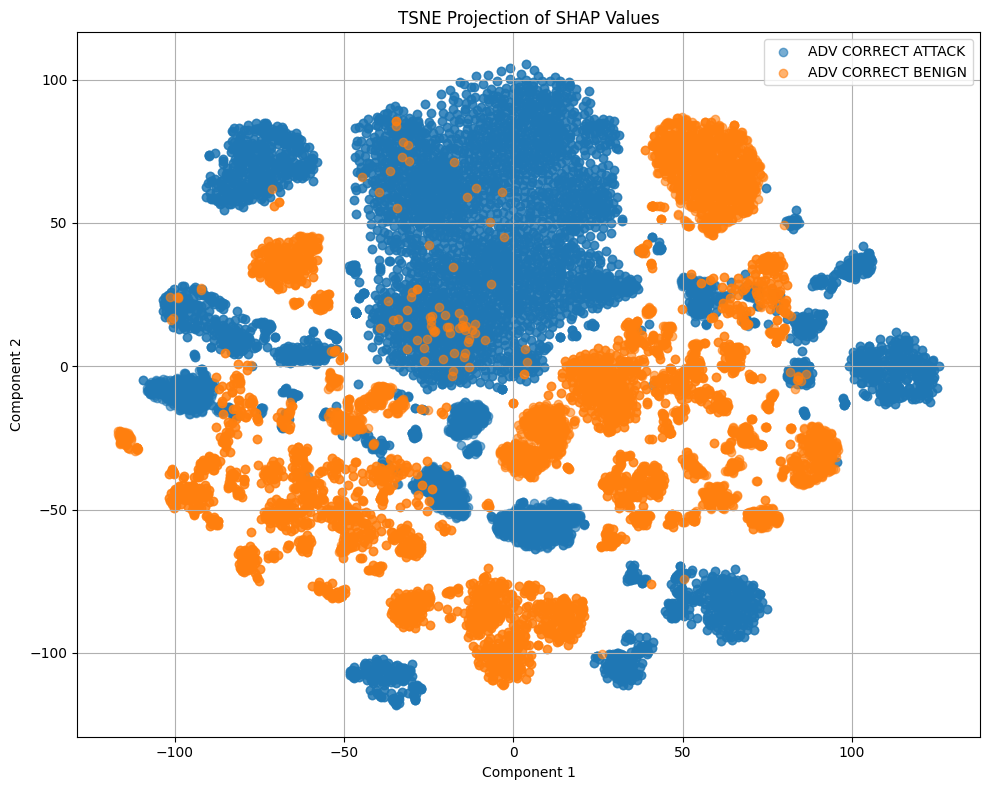

In [40]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Optional: UMAP (must be installed separately)
try:
    import umap
    UMAP_AVAILABLE = True
except ImportError:
    UMAP_AVAILABLE = False

def plot_dim_reduction(X, y_onehot, class_labels, method="pca", **kwargs):
    """
    Plots dimensionality-reduced data using PCA, t-SNE, or UMAP.

    Args:
        X (ndarray or DataFrame): Feature matrix.
        y_onehot (ndarray): One-hot encoded labels.
        class_labels (list of str): Class label names.
        method (str): 'pca', 'tsne', or 'umap'.
        **kwargs: Additional arguments for the reducer (e.g., perplexity for t-SNE).
    """
    y_indices = np.argmax(y_onehot, axis=1)

    if method == "pca":
        reducer = PCA(n_components=2)
    elif method == "tsne":
        reducer = TSNE(n_components=2, random_state=42, **kwargs)
    elif method == "umap":
        if not UMAP_AVAILABLE:
            raise ImportError("UMAP is not installed. Run: pip install umap-learn")
        reducer = umap.UMAP(n_components=2, random_state=42, **kwargs)
    else:
        raise ValueError("Invalid method. Choose from 'pca', 'tsne', or 'umap'.")

    X_reduced = reducer.fit_transform(X)

    # Plot
    plt.figure(figsize=(10, 8))
    for i, label in enumerate(class_labels):
        idx = y_indices == i
        plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1], label=label, alpha=0.6)

    plt.title(f"{method.upper()} Projection of SHAP Values")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Choose method: 'pca', 'tsne', or 'umap'
plot_dim_reduction(X, y, class_samples, method="tsne", perplexity=30)
# plot_dim_reduction(X, y, class_samples, method="pca")

---
## Manual Evaluation
We perform the whole two-stages approach on new unseen data and evaluate the following scores:
- Recall
- Precision
- Accuracy
- F1 Score

In [71]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

# exclude previously used samples
dataset_eval_excluded = dataset.drop(index=used_indices)

X_eval, y_eval, used_eval_indices = dp.preprocess_data(dataset_eval_excluded, encoding_type, normalizer, zero_columns, sample_size=1000, random_sample_state=17)
print(f"Generate Features | Indices: {X_eval.index[:5]}... | Shape: {X_eval.shape}")
print(f"Generate Labels | Indices: {y_eval.index[:5]}... | Shape: {y_eval.shape}")
print(y_eval.value_counts())

-- Preprocessing data --
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Sampling balanced data ---
Sample to shape: (2000, 70)
--- Normalizing features using MinMaxScaler ---
Generate Features | Indices: Index([396307, 158819, 1087007, 1150827, 120348], dtype='int64')... | Shape: (2000, 70)
Generate Labels | Indices: Index([396307, 158819, 1087007, 1150827, 120348], dtype='int64')... | Shape: (2000, 2)
BENIGN  ATTACK
False   True      1000
True    False     1000
Name: count, dtype: int64


In [78]:
importlib.reload(ag)

# X_adv_eval = ag.generate_cw_attacks_parallel(art_model, X_eval, target_label=1, num_cores=num_cores)
# print(f"Create Adversarial Attack | Indices: {X_adv_eval.index[:5]}... | Shape: {X_adv_eval.shape}")

X_adv_eval = ag.generate_fgsm_attacks(art_model, X_eval)
print(f"Create Adversarial Attack | Indices: {X_adv_eval.index[:5]}... | Shape: {X_adv_eval.shape}")

y_pred_adv_eval = ag.evaluate_art_model(art_model, X_adv_eval, y_eval)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

Adversarial FGSM examples generated. Shape: (2000, 70)
Create Adversarial Attack | Indices: Index([396307, 158819, 1087007, 1150827, 120348], dtype='int64')... | Shape: (2000, 70)
Accuracy: 18.80%
              precision    recall  f1-score   support

      ATTACK     0.0063    0.0040    0.0049      1000
      BENIGN     0.2719    0.3720    0.3142      1000

    accuracy                         0.1880      2000
   macro avg     0.1391    0.1880    0.1595      2000
weighted avg     0.1391    0.1880    0.1595      2000

Confusion Matrix: Positive == BENIGN
TN: 4, FP: 996, FN: 628, TP: 372
Predictions on Adversarial Attacks | Indices: Index([396307, 158819, 1087007, 1150827, 120348], dtype='int64')... | Shape: (2000, 2)


In [79]:
importlib.reload(exp)
X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_adv_eval)

print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

PermutationExplainer explainer: 2001it [00:58, 28.40it/s]                          

Create Explanations | Indices: Index([396307, 158819, 1087007, 1150827, 120348], dtype='int64')... | Shape: (2000, 70)


In [86]:
# # normal shap values
# y_pred_adv_eval = ag.evaluate_art_model(art_model, X_eval, y_eval)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

# X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_eval)

# print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

In [80]:
benign_eval_idx = y_eval[y_eval['BENIGN'] == 1].index
attack_eval_idx = y_eval[y_eval['ATTACK'] == 1].index

pred_benign_idx = y_pred_adv_eval[y_pred_adv_eval['BENIGN'] == 1].index
pred_attack_idx = y_pred_adv_eval[y_pred_adv_eval['ATTACK'] == 1].index

# predict
X_eval_detector = X_eval_adv_shap_values_df#.loc[pred_benign_idx]
y_pred_eval_detector = det.predict(detector, X_eval_adv_shap_values_df, y_train_det.columns)

# correctly_classified_det_idx = y_pred_eval_detector[y_pred_eval_detector['BENIGN'] == 1].index
# misclassified_det_idx = y_pred_eval_detector[y_pred_eval_detector['ATTACK'] == 1].index

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step


2025-04-23 18:00:06.516362: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


In [81]:
pred_class_0 = y_pred_eval_detector[y_pred_eval_detector['ADV CORRECT BENIGN'] == 1].index 
pred_class_1 = y_pred_eval_detector[y_pred_eval_detector['ADV CORRECT ATTACK'] == 1].index
# pred_class_2 = y_pred_eval_detector[y_pred_eval_detector['CW MISCLASSIFIED'] == 1].index
# pred_class_3 = y_pred_eval_detector[y_pred_eval_detector['JSMA MISCLASSIFIED'] == 1].index
# pred_class_4 = y_pred_eval_detector[y_pred_eval_detector['CORRECT BENIGN'] == 1].index
print(f"Predicted Class 0: {len(pred_class_0)}")
print(f"Predicted Class 1: {len(pred_class_1)}")
# print(f"Predicted Class 2: {len(pred_class_2)}")
# print(f"Predicted Class 3: {len(pred_class_3)}")
# print(f"Predicted Class 4: {len(pred_class_4)}")

Predicted Class 0: 970
Predicted Class 1: 1030


In [82]:
# TODO: define correct and misclassified classes for each attack:
benign_pred_idx = y_pred_eval_detector.loc[pred_class_0].index # Detector classifies 'BENIGN' samples as correct 'BENIGN'
attack_pred_idx = y_pred_eval_detector.loc[pred_class_1].index # Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK'

# After Detector Stage
TP = len(benign_eval_idx.intersection(benign_pred_idx)) # Detector classifies 'BENIGN' samples as correct 'BENIGN'
print(f"Detector classifies 'BENIGN' samples as correct 'BENIGN': {TP}")
FP = len(attack_eval_idx.intersection(benign_pred_idx)) # Detector classifies 'ATTACK' samples as correct 'BENIGN'
print(f"Detector mis-classifies 'ATTACK' samples as correct 'BENIGN': {FP}")

TN = len(attack_eval_idx.intersection(attack_pred_idx)) # Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK'
print(f"Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK': {TN}")
FN = len(benign_eval_idx.intersection(attack_pred_idx)) # Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK'
print(f"Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK': {FN}")

print(f"TP: {TP}")
print(f"FP: {FP}")
print(f"TN: {TN}")
print(f"FN: {FN}")
print(f"Sum: {TP + FP + TN + FN}")

Detector classifies 'BENIGN' samples as correct 'BENIGN': 965
Detector mis-classifies 'ATTACK' samples as correct 'BENIGN': 5
Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK': 995
Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK': 35
TP: 965
FP: 5
TN: 995
FN: 35
Sum: 2000


In [83]:
from sklearn.metrics import classification_report

print(f"Global Accuracy: {(TP + TN) / (TP + FP + TN + FN) * 100:.2f}%")

# Construct a fake y_true and y_pred to match sklearn's classification_report format
y_true = np.array([1] * TP + [0] * TN + [1] * FN + [0] * FP)  # True labels
y_pred = np.array([1] * TP + [0] * TN + [0] * FN + [1] * FP)  # Predicted labels

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['ATTACK', 'BENIGN'], digits=4) # reverse labels because classification_report assumes first label is 0
print(report)

print(f"True Negative Rate: {TN/(TN+FP)*100:.2f}%")
print(f"False Positive Rate: {FP/(TN+FP)*100:.2f}%")
print(f"True Positive Rate: {TP/(TP+FN)*100:.2f}%")
print(f"False Negative Rate: {FN/(TP+FN)*100:.2f}%")

Global Accuracy: 98.00%
              precision    recall  f1-score   support

      ATTACK     0.9660    0.9950    0.9803      1000
      BENIGN     0.9948    0.9650    0.9797      1000

    accuracy                         0.9800      2000
   macro avg     0.9804    0.9800    0.9800      2000
weighted avg     0.9804    0.9800    0.9800      2000

True Negative Rate: 99.50%
False Positive Rate: 0.50%
True Positive Rate: 96.50%
False Negative Rate: 3.50%


In [72]:
sample_indices = y_pred_eval_detector.index
print(f"#Attack-Samples: {len(sample_indices)}")

detected_indices = np.unique(np.concatenate((pred_class_4, pred_class_1)))
print(f"Predicted indices: {len(detected_indices)}")

correct_benign_pred_indices = np.intersect1d(sample_indices, detected_indices)
print(f"Predicted Normal indices: {len(correct_benign_pred_indices)}")

normal_benign_misclassified_indices = np.setdiff1d(sample_indices, detected_indices)
print(f"Normal Misclassified indices: {len(normal_benign_misclassified_indices)}")

print(f"ADV Detection Rate: {len(correct_benign_pred_indices) / len(sample_indices):.4f}")
print(f"Misclassification Rate: {len(normal_benign_misclassified_indices) / len(sample_indices):.4f}")

#Attack-Samples: 2000
Predicted indices: 907
Predicted Normal indices: 907
Normal Misclassified indices: 1093
ADV Detection Rate: 0.4535
Misclassification Rate: 0.5465


### Attack Success Rate (ASR)

In [102]:
# Attack = Misclassified as benign
attacks_idx = attack_eval_idx.intersection(pred_benign_idx)
print(f"Misclassified as BENIGN - Attacks: {len(attacks_idx)}")


# Accepted Samples
accepted_benign_det_idx = y_pred_eval_detector.loc[pred_class_4].index # Detector classifies 'BENIGN' samples as correct 'BENIGN'
print(f"Accepted Samples: {len(accepted_benign_det_idx)}")

# Attack Success
correct_benign_det = attacks_idx.intersection(accepted_benign_det_idx)
print(f"Successful Attacks: {len(correct_benign_det)}")

# Attack Success Rate
attack_success_rate = len(correct_benign_det) / len(attacks_idx) # / #working attacks
print(f"Attack Success Rate: {attack_success_rate:.4f}")
true_positive_rate = len(correct_benign_det) / len(attack_eval_idx) # / #all attacked samples
print(f"Attack Success Rate (all attacked samples): {true_positive_rate:.4f}")

Misclassified as BENIGN - Attacks: 1000
Accepted Samples: 984
Successful Attacks: 9
Attack Success Rate: 0.0090
Attack Success Rate (all attacked samples): 0.0090


### BENIGN False Negative Rate

In [54]:
# normal shap values

y_pred_adv_eval = ag.evaluate_art_model(art_model, X_eval, y_eval)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_eval)

print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

Accuracy: 98.50%
              precision    recall  f1-score   support

      ATTACK     0.9764    0.9940    0.9851      1000
      BENIGN     0.9939    0.9760    0.9849      1000

    accuracy                         0.9850      2000
   macro avg     0.9852    0.9850    0.9850      2000
weighted avg     0.9852    0.9850    0.9850      2000

Confusion Matrix: Positive == BENIGN
TN: 994, FP: 6, FN: 24, TP: 976
Predictions on Adversarial Attacks | Indices: Index([1237277, 1117276, 1077149, 213477, 144738], dtype='int64')... | Shape: (2000, 2)


PermutationExplainer explainer: 2001it [00:51, 31.29it/s]                          

Create Explanations | Indices: Index([1237277, 1117276, 1077149, 213477, 144738], dtype='int64')... | Shape: (2000, 70)


In [1]:
# predict
X_eval_detector = X_eval_adv_shap_values_df.loc[pred_benign_idx]
y_pred_eval_detector = det.predict(detector, X_eval_detector, y_train_det.columns)

pred_class_0 = y_pred_eval_detector[y_pred_eval_detector['ADV CORRECT BENIGN'] == 1].index 
pred_class_1 = y_pred_eval_detector[y_pred_eval_detector['ADV MISCLASSIFIED'] == 1].index
pred_class_4 = y_pred_eval_detector[y_pred_eval_detector['CORRECT BENIGN'] == 1].index
print(f"Predicted Class 0: {len(pred_class_0)}")
print(f"Predicted Class 1: {len(pred_class_1)}")
print(f"Predicted Class 4: {len(pred_class_4)}")


# Accepted Samples
accepted_benign_det_idx = y_pred_eval_detector.loc[pred_class_4].index # Detector classifies 'BENIGN' samples as correct 'BENIGN'
print(f"Accepted Samples: {len(accepted_benign_det_idx)}")

# Correct BENIGN predicted Samples
correct_benign_det = benign_eval_idx.intersection(accepted_benign_det_idx)
print(f"Correct BENIGN Predicted: {len(correct_benign_det)}")

# True Positive Rate
true_positive_rate = len(correct_benign_det) / len(benign_eval_idx) # / #all BENIGN samples
print(f"Attack Success Rate (all attacked samples): {true_positive_rate:.4f}")

NameError: name 'X_eval_adv_shap_values_df' is not defined